## Poetry Generation, Part 1: Hidden Markov Models
In this Jupyter notebook, we train an unsupervised HMM on the given Shakespearean sonnets and generate a 14-line sonnet. 

In [3]:
import os
import re
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

### Training Unsupervised HMM

#### Parse text

In [4]:
original_text = open(os.path.join(os.getcwd(), 'data/shakespeare_no99_no126.txt')).read()
original_text = "".join(filter(lambda x: not x.isdigit(), original_text)) 
original_text = original_text.lower().strip()
original_text = re.sub("[.,?!\";:]", "", original_text)
raw_text = re.sub(r'(\n\s*)+\n', '\n\n', original_text)

#### Generate syllable dictionary

In [5]:
# Getting syllable dictionary
syllable_dict = {}
file = open(os.path.join(os.getcwd(),
                'data/Syllable_dictionary.txt')).read()
lines = [line.split() for line in file.split('\n') if line.split()]

for line in lines:
    real, end = [], []
    for i in range(1, len(line)):
        if line[i][0] == 'E':
            end.append(int(line[i][1]))
        else:
            real.append(int(line[i][0]))
    syllable_dict[line[0]] = [real[::-1], end[::-1]]


#### Helper functions to generate sonnets

In [19]:
def invert_obs_map(o_map):
    new_obs_map = dict()
    
    for key, val in o_map.items():
        new_obs_map[val] = key
    return new_obs_map

def generate_sample_sentence(my_hmm, inv_obs_map, syl_dict, n_syl=10):
    emission, states = my_hmm.generate_sonnet_emission(n_syl, inv_obs_map, syl_dict)
    
    sentence = [inv_obs_map[elem] for elem in emission]
    sentence[0] = sentence[0].capitalize()
    
    return " ".join(sentence)

def get_sample_sonnet(my_hmm, obs_map, syl_dict):
    
    sonnet = []
    
    inv_o_map = invert_obs_map(obs_map)
    
    for _ in range(15):
        sonnet.append(generate_sample_sentence(my_hmm, inv_o_map, syl_dict, n_syl=10))
        
    return "\n".join(sonnet)
    

In [20]:
obs, obs_map = parse_observations(raw_text)

In [21]:
# For testing
hmm1 = unsupervised_HMM(obs, 1, 10)

In [23]:
print(get_sample_sonnet(hmm1, obs_map, syllable_dict))

Summers west sake loves self to a i nor
Is friend what hath thou day hell he let see
This my of there into not praise sorrow
One are the dost and prime substance my fear
And mistress verse to to doth by in are
The he in gave please audit doth are thee
Incapable ride the show in eye in
Sense both than or memory state moon and
Enclose lest both thou my in arise i
Was ill heaven though time of proved or in
Receivst passed your give me the add thee tomb
Not his long like and the will that and but
This dear world separation with when halt
Painful eye it of more with she breathers
Virgin than knows your wind style from sweet my


In [24]:
hmm10 = unsupervised_HMM(obs, 10, 100)

In [25]:
print('Sample Sonnet (HMM10):\n====================')
print(get_sample_sonnet(hmm10, obs_map, syllable_dict))

Sample Sonnet (HMM10):
Minds them fair long for age but did doth one
To eye went thoughts night trees revenues like
Thee dost self if this nor away of song
One your grave being not privilege the
Of worthiness and more alone and thou
For most shade dial out thorns and they who
Glass so orient nor duty poet so
Never if care in says mine take we but
Sins inhabit such thou doth spring forgot
All nor free with her make eyes show i so
Can wisdom there own death against very
Can their life and guilty cost with love in
If do cherubins i account decay
Own purity and how not child make out
Might found gone my beauty and tongues have and


In [26]:
hmm16 = unsupervised_HMM(obs, 16, 100)

In [28]:
print('Sample Sonnet (HMM16):\n====================')
print(get_sample_sonnet(hmm16, obs_map, syllable_dict))

Sample Sonnet (HMM16):
Sweet show upon some tender that why that
The jewel doth did thy face confounds story
If from back needing argument shadow
Doth whose best that dead my paper to his
My horse glory to every sweet then tell
Contented to his numbers from the on
Thou thy lovesuit character you waste dead please
To my self in the is deep user by
It since having at thy beauty thou die
Thee false beauty watch every and hath thy
As their believed in did before gentle
Change i on that and were as that in my
Changing above i on his forwards being
Twain can that me of most sweet goodness let
Gave pitied gazeth whatsoever hap


### Visualization

#### Overall Wordcloud over All Sonnets

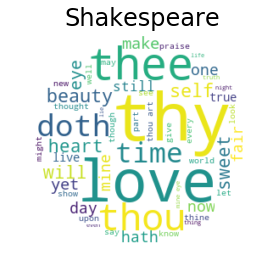

In [30]:
wordcloud = text_to_wordcloud(raw_text, title='Shakespeare')

#### Wordclouds for Each Hidden State

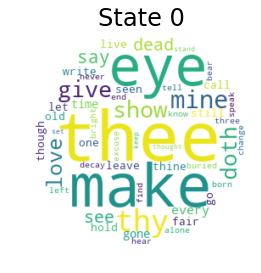

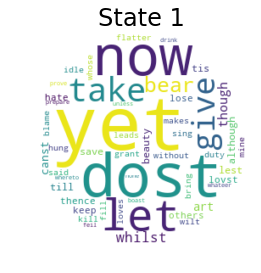

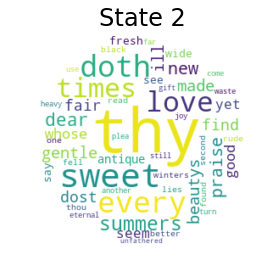

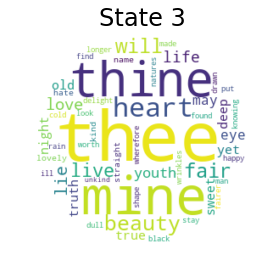

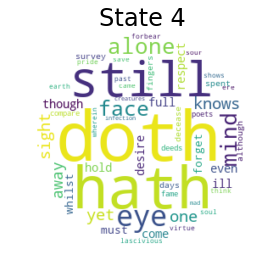

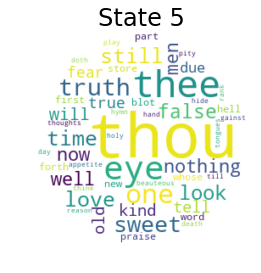

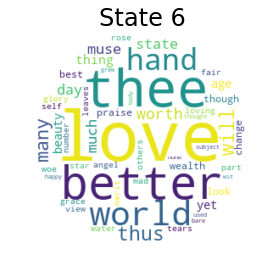

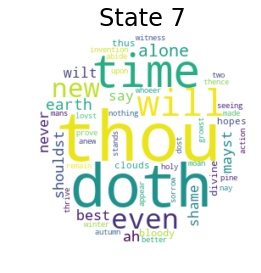

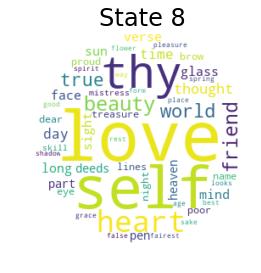

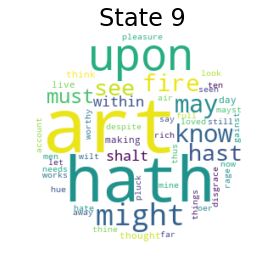

In [31]:
wordclouds = states_to_wordclouds(hmm10, obs_map)

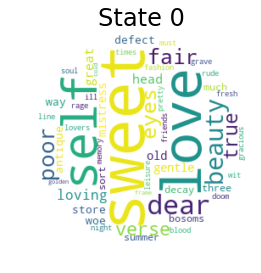

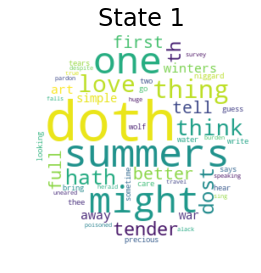

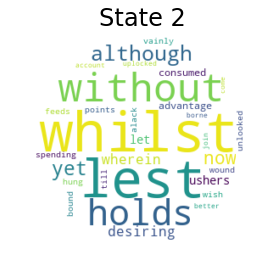

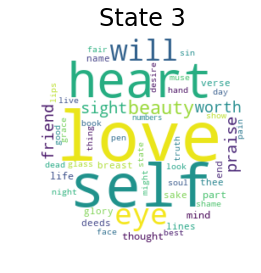

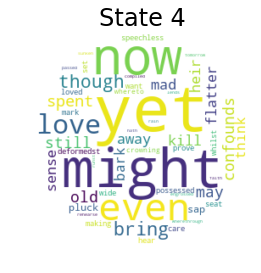

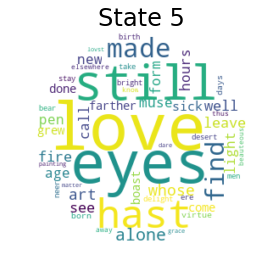

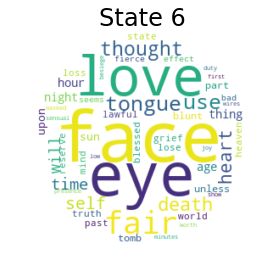

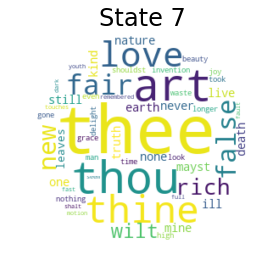

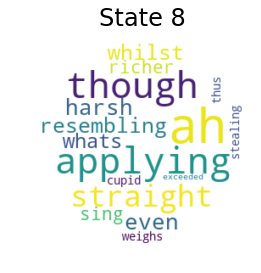

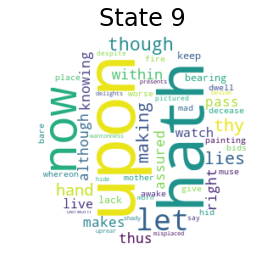

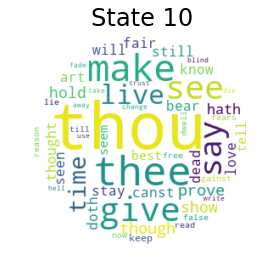

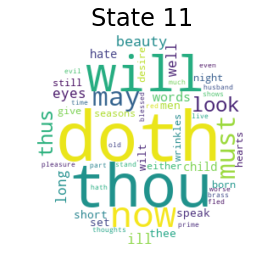

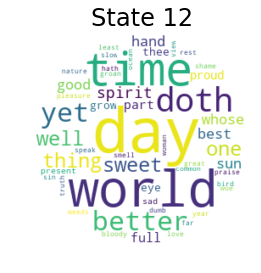

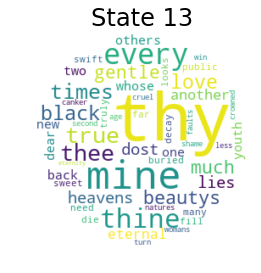

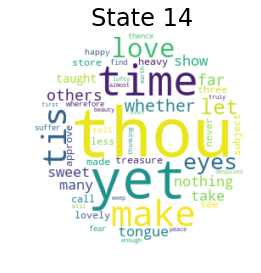

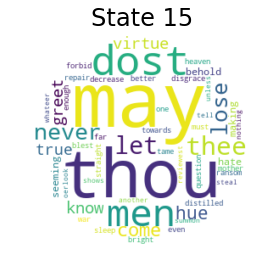

In [32]:
wordclouds = states_to_wordclouds(hmm16, obs_map)